In [1]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'/Users/ryan/github/prosodic')
from llmdh import *
import prosodic
prosodic.USE_CACHE=False

In [2]:
# RhymeLLM.gather()

In [3]:
@classmethod
def gather_kaggle(self):
    with SqliteDict(PATH_OUTPUT,flag='r') as db:
        return pd.DataFrame(db[k] for k in db.keys())

RhymeLLM.gather_kaggle = gather_kaggle

In [4]:
RhymeLLM.gather_kaggle()

,Author,Title,Poetry Foundation ID,Content,num_stanzas,num_lines
0,Charles Olson,As the Dead Prey Upon Us,54311,"As the dead prey upon us,\nthey are the dead i...",68,216
1,Diane Glancy,Reservation,50883,This prairie holds us\nwith its plainness.\nAn...,4,24
2,Dana Levin,Urgent Care,55742,Having to make eye contact\nwith the economy—\...,36,71
3,Don Bogen,Vaporizer,55048,"A charm,\na dream of protection.\nGurgles hold...",29,85
4,Tom Clark,Baseball and Classicism,47076,Every day I peruse the box scores for hours\nS...,2,8
...,...,...,...,...,...,...
15647,Richard Wilbur,A Barred Owl,49432,The warping night air having brought the boom\...,1,11
15648,Robert Wrigley,After a Rainstorm,54867,"Because I have come to the fence at night,\nth...",3,15
15649,Arseny Tarkovsky,A blind man was riding an unheated train,54748,"A blind man was riding an unheated train,\nFro...",5,11
15650,Stefi Weisburd,Little God Origami\n \n \n \n Launch Audio ...,42260,The number of corners in the soul can't\ncompa...,0,14


In [17]:
@classmethod
@cache
def gather_all(self, max_per=100):
    with logmap('gathering all') as lm, lm.verbosity(0):
        qstr='num_lines<=14'
        df2=self.gather_kaggle().query(qstr).sample(frac=1).iloc[:max_per]
        # df1=self.gather().query(qstr)
        df1=self.gather().query(qstr).sample(frac=1).iloc[:max_per]
        if len(df1)>len(df2):
            df1=df1.sample(len(df2))
        return pd.concat([df1.assign(corpus="LLM"),df2.assign(corpus="poetryfoundation.org")]).fillna('')

RhymeLLM.gather_all = gather_all

In [24]:
@classmethod
def gather_parse(self, max_per=100):
    df=RhymeLLM.gather_all(max_per=max_per)
    df['poem_txt']=[x or y for x,y in zip(df.poem, df.Content)]
    o = []
    with logmap('parsing') as lm:
        for i,row in lm.iter_progress(df.iterrows(), total=len(df)):
            with lm.verbosity(0):
                txt=row.poem_txt
                text = prosodic.Text(txt)
                o.append({
                    **dict(row),
                    "txt":txt,
                    "num_stanzas": len(text.stanzas),
                    "num_lines": len(text.lines),
                    "num_rhymes": len(text.get_rhyming_lines()),
                    "is_rhyming": text.is_rhyming,
                })
    odf=pd.DataFrame(o)
    return odf

RhymeLLM.gather_parse = gather_parse

In [25]:
df = RhymeLLM.gather_parse()

2094    The wind blows across the fields of green\nAs ...
1407    The wind blows cold and damp,\nA chill that ru...
194     **Unrhymed Verse**\n\nIn words unchained, a ta...
1503    I am not sure if this is exactly what you are ...
1767    A lonely wind blew through the trees\nAnd touc...
                              ...                        
296     I walk down the garden paths,\nAnd all the daf...
297     He (my captor) gave me a bisquit, which I put ...
298     But love whilst that thou mayst be loved again...
299     After the murder, I called a meeting\nto see i...
300     1\nThe white butterfly in the park is being re...
Name: poem_txt, Length: 903, dtype: object

In [8]:
o = []
for i,row in df.iterrows():
    poem_txt = row.Content
    text = prosodic.Text(row.poem_txt)
    o.append({
        **dict(row),
        "num_stanzas": len(text.stanzas),
        "num_lines": len(text.lines),
        "num_rhymes": len(text.get_rhyming_lines()),
        "is_rhyming": text.is_rhyming,
    })
odf=pd.DataFrame(o)

⎾ building text with 61 words @ 2024-03-15 13:41:46,368
￨ ⎾ tokenizing @ 2024-03-15 13:41:46,490
￨ ⎿ 0 seconds @ 2024-03-15 13:41:46,497
￨ ⎾ building stanzas @ 2024-03-15 13:41:46,497
￨ ￨ iterating stanzas: 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]
￨ ⎿ 0.5 seconds @ 2024-03-15 13:41:47,016
⎿ 0.6 seconds @ 2024-03-15 13:41:47,016
⎾ saving object to RedisDict under key a4c2e16c @ 2024-03-15 13:41:47,038
⎿ 0 seconds @ 2024-03-15 13:41:47,065
⎾ building text with 25 words @ 2024-03-15 13:41:47,150
￨ ⎾ tokenizing @ 2024-03-15 13:41:47,265
￨ ⎿ 0 seconds @ 2024-03-15 13:41:47,267
￨ ⎾ building stanzas @ 2024-03-15 13:41:47,268
￨ ￨ iterating stanzas: 100%|██████████| 1/1 [00:00<00:00, 159.89it/s]
￨ ⎿ 0 seconds @ 2024-03-15 13:41:47,276
⎿ 0.1 seconds @ 2024-03-15 13:41:47,277
⎾ saving object to RedisDict under key 7d2bf93c @ 2024-03-15 13:41:47,299
⎿ 0 seconds @ 2024-03-15 13:41:47,323
⎾ building text with 120 words @ 2024-03-15 13:41:47,370
￨ ⎾ tokenizing @ 2024-03-15 13:41:47,490
￨ ⎿ 0 sec

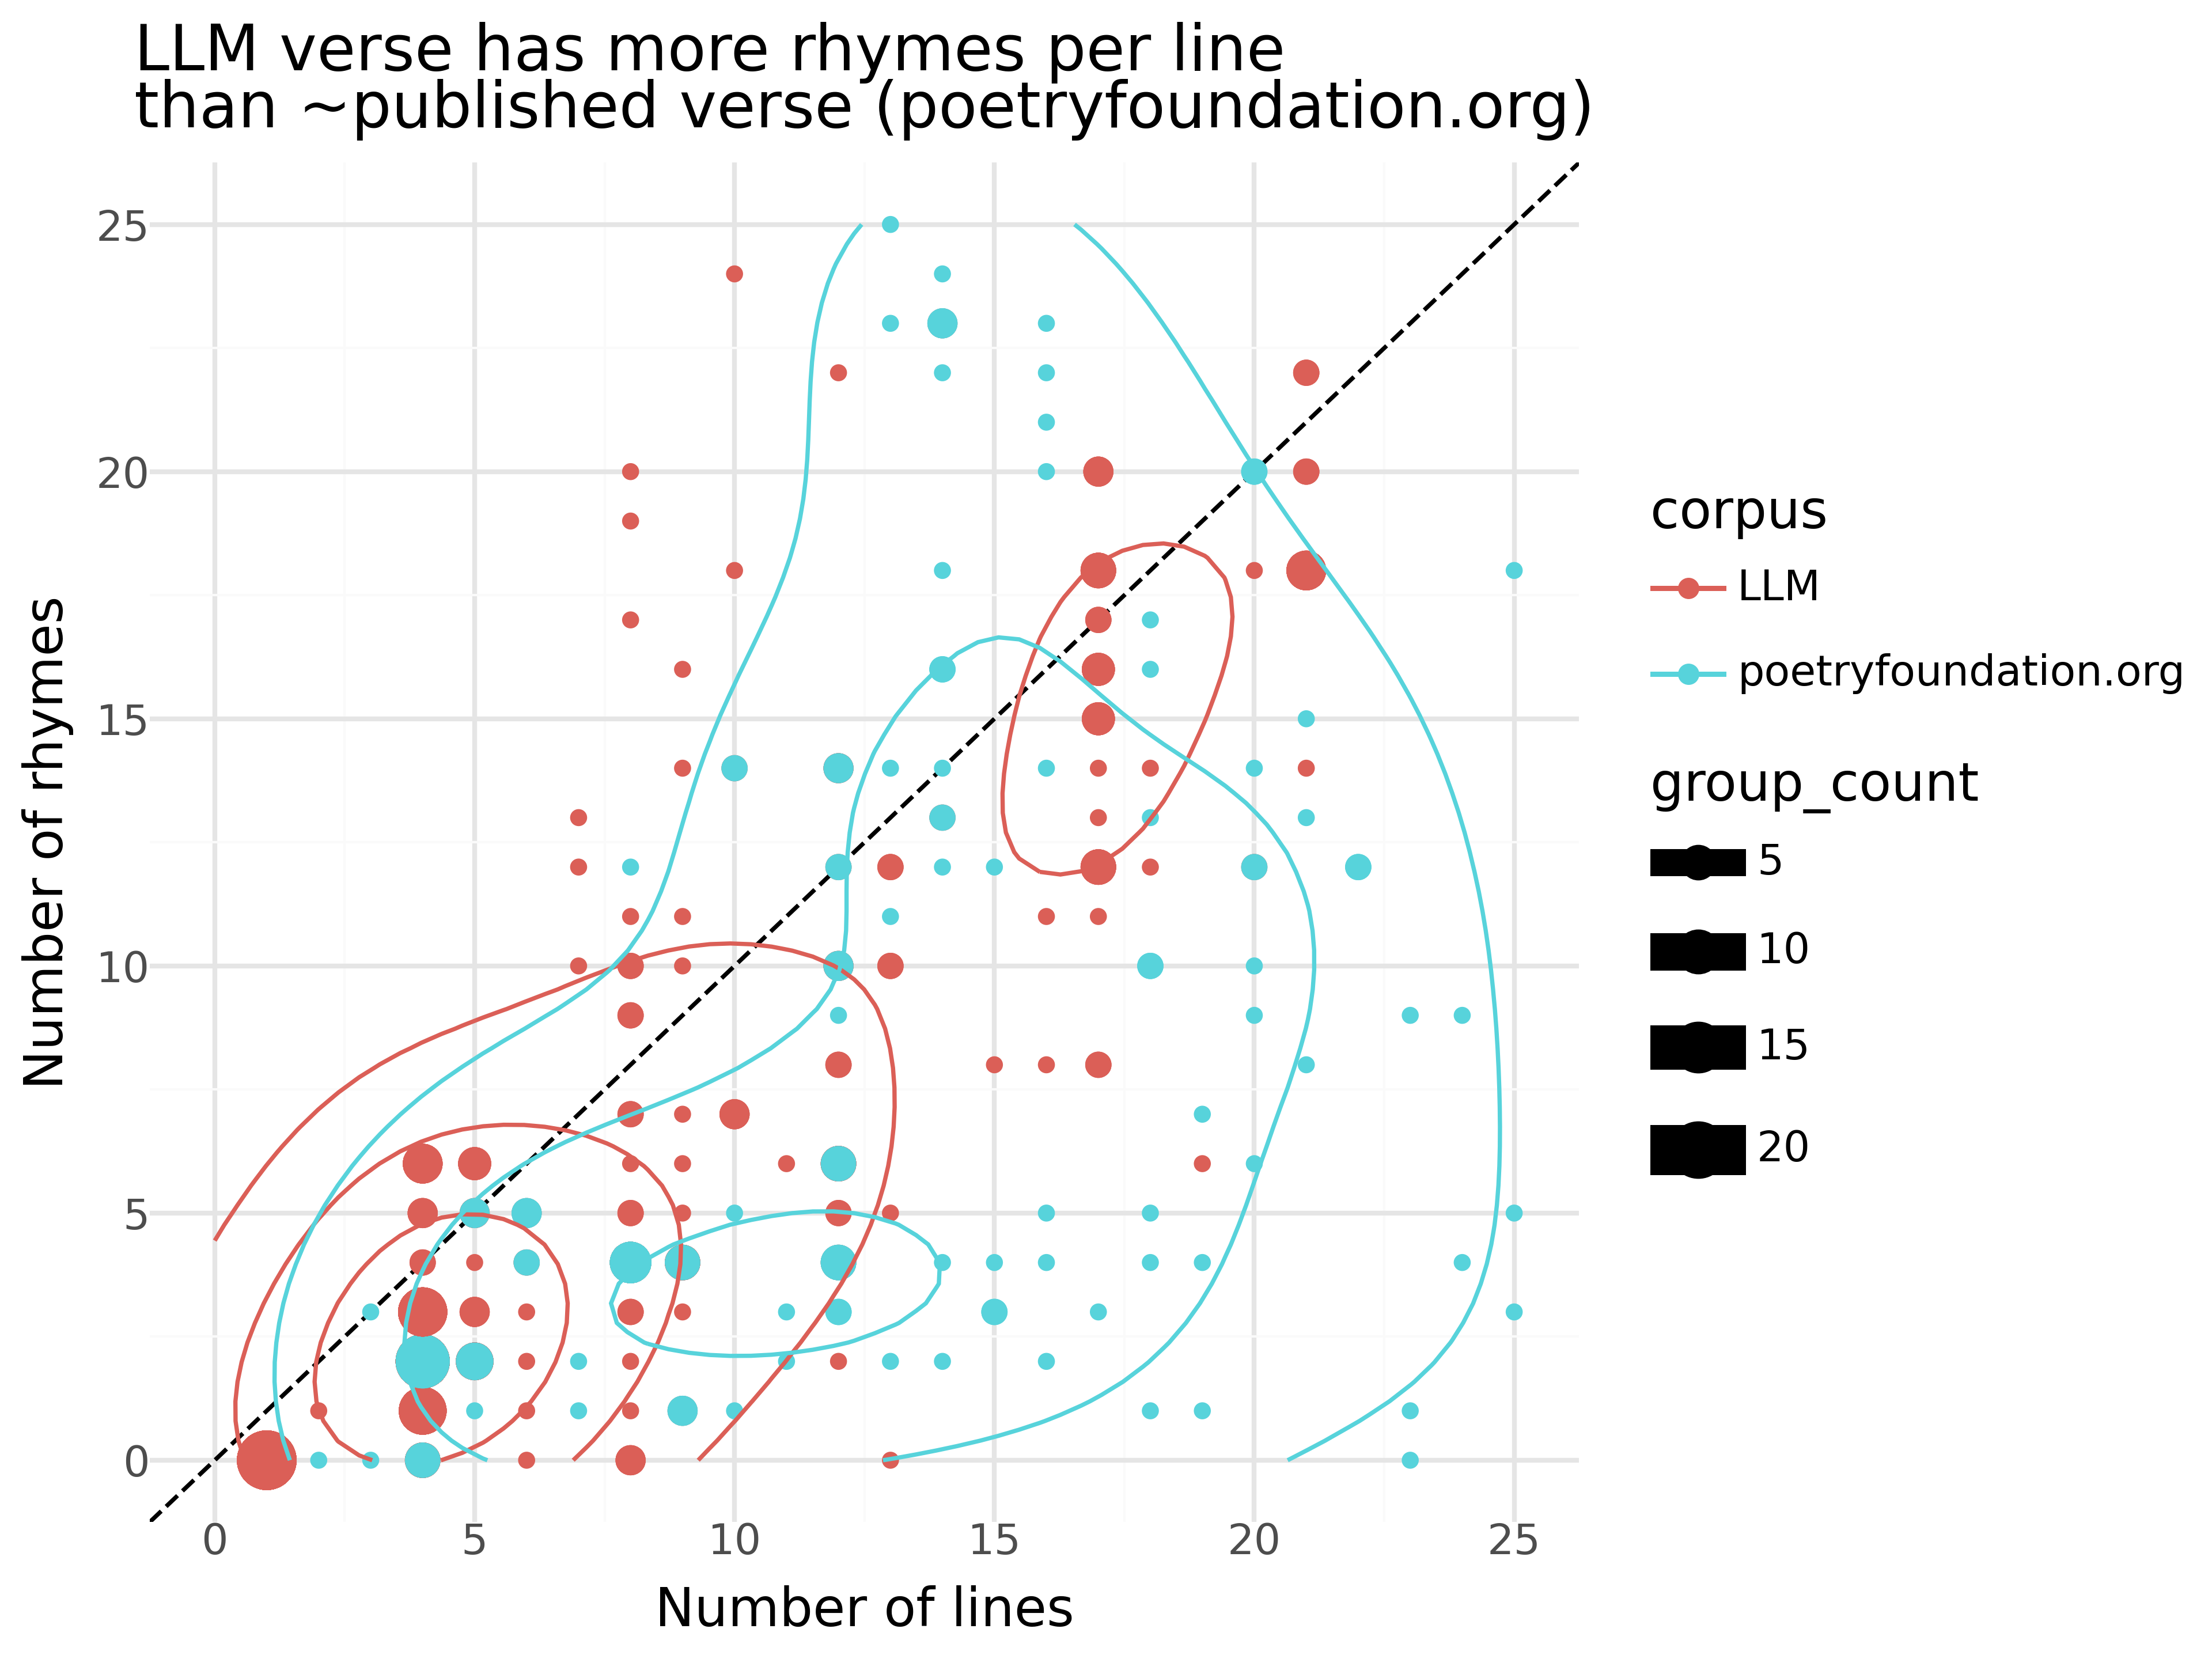

In [10]:
# !pip install plotnine
import plotnine as p9
p9.options.dpi = 300
figdf = odf.query('num_rhymes <= 25 & num_lines <= 25')
figdf = pd.concat(
    gdf.assign(group_count=len(gdf))
    for g,gdf in figdf.groupby(['num_rhymes','num_lines'])
)
fig = p9.ggplot(figdf, p9.aes(x='num_lines', y='num_rhymes', color='corpus', size='group_count'))
fig += p9.geom_abline(intercept=0, slope=1, linetype='dashed')
fig+= p9.geom_point()
fig+= p9.geom_density_2d()
fig+=p9.scale_y_continuous(limits=(0,25))
fig+=p9.scale_x_continuous(limits=(0,25))
fig+=p9.theme_minimal()
fig+=p9.labs(
    x='Number of lines',
    y='Number of rhymes',
    color='corpus',
    title='LLM verse has more rhymes per line\nthan ~published verse (poetryfoundation.org)'
)
fig.save('fig.2ddensity.png')
fig

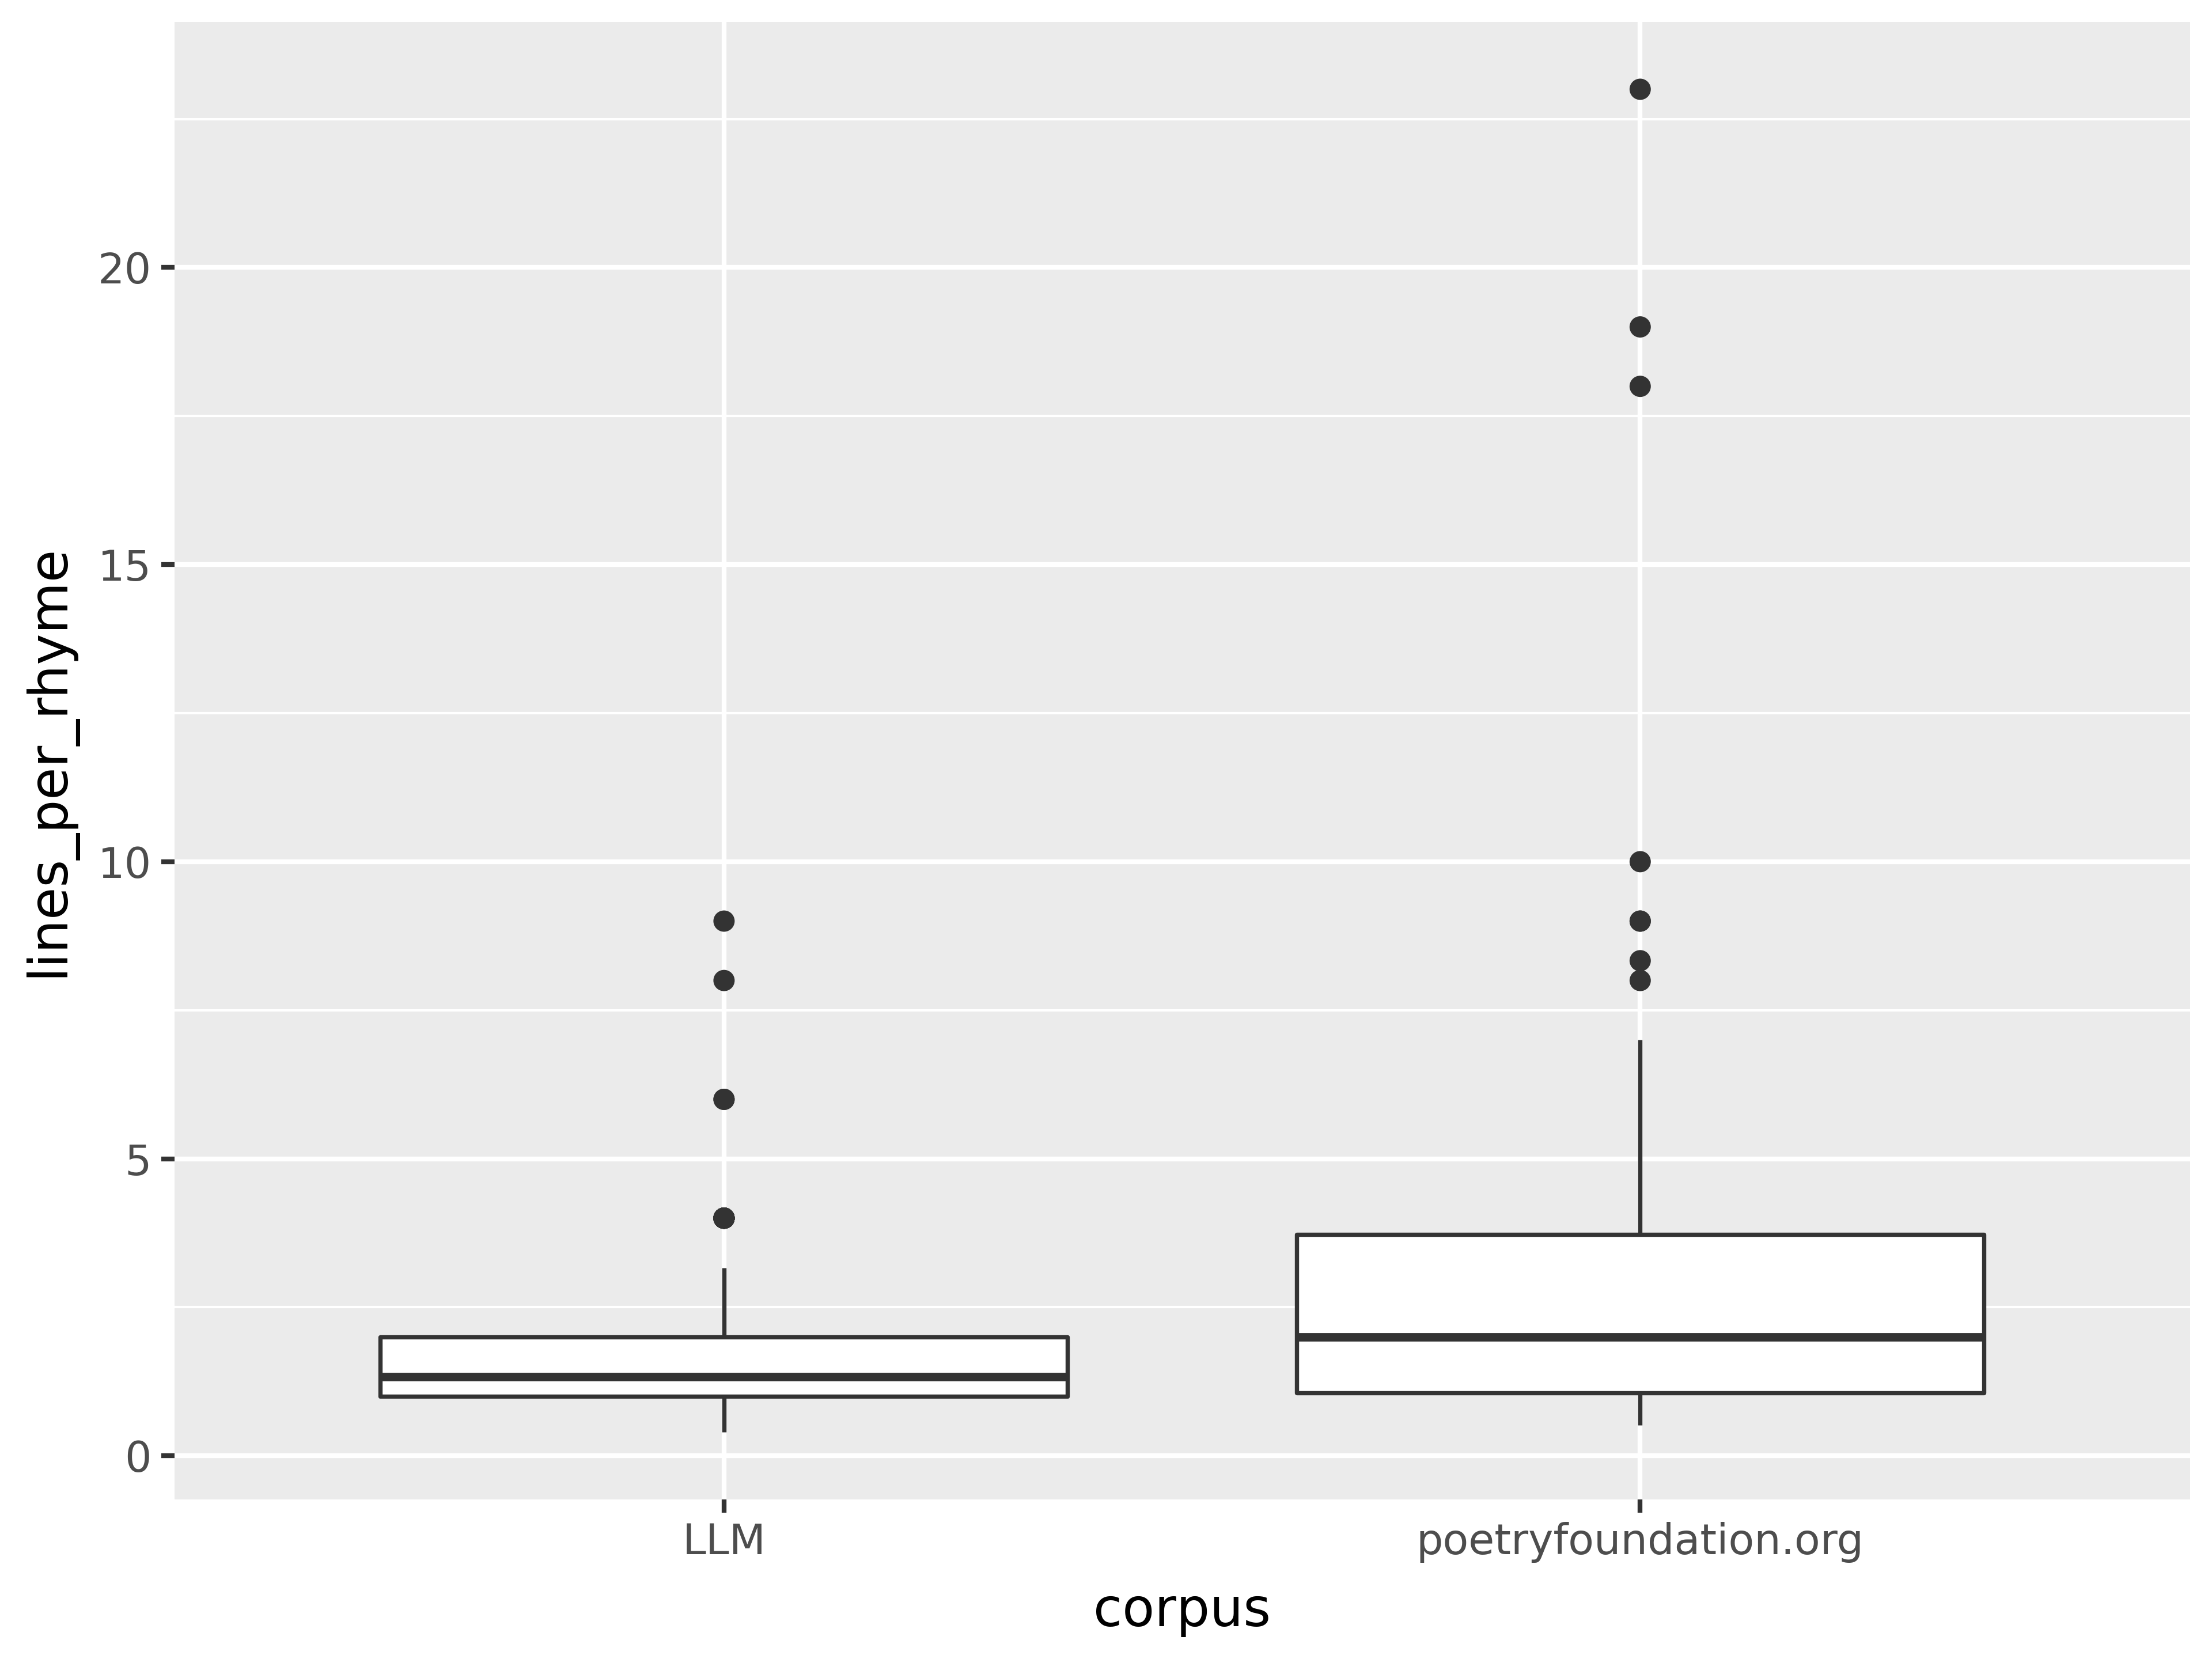

In [19]:
df=odf
df['lines_per_rhyme'] = df['num_lines'] / df['num_rhymes']
figdf = df.query('num_rhymes <= 25 & num_lines <= 25')
fig = p9.ggplot(figdf, p9.aes(x='corpus', y='lines_per_rhyme')) + p9.geom_boxplot()
fig

In [11]:
df = odf
df['corpus_model']=[f'{corpus}_{model}' if model else corpus for corpus,model in zip(df.corpus, df.model)]

figdf = df.query('num_lines <= 25')
p9.ggplot(figdf, p9.aes(x='lines_per_rhyme', color='corpus_model')) + p9.geom_density()

PlotnineError: "Could not evaluate the 'x' mapping: 'lines_per_rhyme' (original error: name 'lines_per_rhyme' is not defined)"

PlotnineError: "Could not evaluate the 'x' mapping: 'lines_per_rhyme' (original error: name 'lines_per_rhyme' is not defined)"